In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
userdata = pd.read_csv('../dataset/User-AnimeReview.csv')
userdata.head()



,user_id,anime_id,score,status,episodes_seen
0,doobiez420,52991,NaN,Watching,13.0
1,LessKk,52991,NaN,Watching,12.0
2,ByAsh156,52991,9.0,Watching,NaN
3,ShuBoxx_,52991,NaN,Plan to Watch,NaN
4,charlieleb,52991,8.0,Completed,28.0


In [3]:
print("Number of rows before dropping duplicates:", len(userdata))
userdata.isna().sum()


Number of rows before dropping duplicates: 16573880


user_id                40
anime_id                0
score            10968315
status              14352
episodes_seen     7611899
dtype: int64

In [4]:
userdata.nunique()

user_id          1196322
anime_id           27702
score                 10
status                 5
episodes_seen        764
dtype: int64

In [5]:
nandropped = userdata.copy()
nandropped.dropna(inplace=True)

In [6]:
nandropped.nunique()

user_id          607477
anime_id          27381
score                10
status                4
episodes_seen       697
dtype: int64

In [7]:
nandropped.to_csv('cleaned_userdata.csv', index=False)

In [8]:
nandropped.describe()

,anime_id,score,episodes_seen
count,5.454899e+06,5.454899e+06,5.454899e+06
mean,2.806141e+04,6.645204e+00,8.098657e+01
std,1.875091e+04,2.260999e+00,2.129579e+03
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,8.697000e+03,5.000000e+00,1.000000e+00
50%,3.185900e+04,7.000000e+00,2.000000e+00
75%,4.161200e+04,8.000000e+00,1.200000e+01
max,6.173000e+04,1.000000e+01,6.553500e+04


In [39]:
print(nandropped[nandropped['episodes_seen'] > 1000].describe())

           anime_id        score  episodes_seen
count   7946.000000  7946.000000    7946.000000
mean   26751.196954     2.200227   48620.191417
std    14843.742749     2.568347   27448.708689
min       21.000000     1.000000    1001.000000
25%    10241.000000     1.000000    9999.000000
50%    30207.500000     1.000000   65535.000000
75%    38321.750000     1.000000   65535.000000
max    61420.000000    10.000000   65535.000000


In [7]:
pd.set_option('display.max_rows', 500)   # or None for unlimited
pd.set_option('display.max_colwidth', None)  # prevent column truncation


In [8]:
rating_std = nandropped.groupby('user_id')['score'].std()
uniform_users = rating_std[rating_std < 0.3].index
type(uniform_users)

pandas.core.indexes.base.Index

In [9]:
print(len(uniform_users))

51068


In [11]:
review_counts = nandropped['user_id'].value_counts()
heavy_users = review_counts[review_counts > 1200].index
print(heavy_users)
print(len(heavy_users))

Index(['whoskantus', 'ReMightyRon', 'sexyNeet', 'MoistBlade', 'schizoparanoic',
       'trolleybuslover', 'jojokis', 'HuntersBlade71', 'Nihilisticdegene',
       '8angel',
       ...
       'Nemo_Memoire', 'Dreyus', 'blossom15', 'dant35', 'Catexia', 'RENOSSSS',
       'GarainaGH', 'irenevanessa133', 'TheMrEmperror', 'Zangril'],
      dtype='object', name='user_id', length=305)
305


In [12]:
nandropped.describe()

,anime_id,score,episodes_seen
count,5.454899e+06,5.454899e+06,5.454899e+06
mean,2.806141e+04,6.645204e+00,8.098657e+01
std,1.875091e+04,2.260999e+00,2.129579e+03
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,8.697000e+03,5.000000e+00,1.000000e+00
50%,3.185900e+04,7.000000e+00,2.000000e+00
75%,4.161200e+04,8.000000e+00,1.200000e+01
max,6.173000e+04,1.000000e+01,6.553500e+04


In [25]:
mask = (nandropped['episodes_seen'] == 1) 

trolls = nandropped.loc[mask]

len(trolls)

2620011

In [21]:
trolls[trolls['user_id'] == 'ReMightyRon'].head(n = 20)

,user_id,anime_id,score,status,episodes_seen
10923873,ReMightyRon,9947,10.0,Completed,3057.0


In [10]:
nandropped.columns


Index(['user_id', 'anime_id', 'score', 'status', 'episodes_seen'], dtype='object')

In [26]:
troll_users = trolls['user_id'].unique()
print(troll_users)
print(len(troll_users))

['nxptunzzz' 'ralphkitzer' 'mochidays-' ... 'jojawopon' 'TheMiseryChick'
 'benny566']
354038


In [27]:
trolls.describe()

,anime_id,score,episodes_seen
count,2.620011e+06,2.620011e+06,2620011.0
mean,2.872176e+04,6.252697e+00,1.0
std,1.846814e+04,2.306005e+00,0.0
min,1.000000e+00,1.000000e+00,1.0
25%,9.716000e+03,5.000000e+00,1.0
50%,3.175700e+04,6.000000e+00,1.0
75%,4.174400e+04,8.000000e+00,1.0
max,6.173000e+04,1.000000e+01,1.0


In [13]:
trolls.head(n = 20)

,user_id,anime_id,score,status,episodes_seen
12407798,SamLuv,10241,2.0,Completed,1006.0
12407807,L7_Jinzo,10241,2.0,Completed,1006.0
12408007,seth,10241,2.0,Completed,1006.0
12408157,Zsingp,10241,2.0,Completed,1006.0
12408224,api_madman9512,10241,2.0,Completed,1006.0


In [22]:


animedata = pd.read_csv('../somewhatcleanedAnime.csv')
mask = (animedata['anime_id'] == 9947) 
epmax = animedata.loc[mask]
epmax.head(n = 20)

,anime_id,name,title_english,title_japanese,type,episodes,rating,rank,popularity,members,status,source,duration,genre,studio,synopsis,aired_from_year,aired_to_year,duration_mins,duration_bucket
9751,9947,Lan Mao,3000 Whys Of Blue Cat,蓝猫淘气3000问,TV,3057.0,6.06,9729.0,14745,933,Finished Airing,Original,11 min per ep,"Adventure, Comedy",NaN,"Adventures include going into deep sea and accompanying dinosaurs. The shows are mainly based on science or science fiction. It has been popular in China, one reason might be the fact that many of the Chinese youth have been sending questions to the studio, and the studio answers them with one of Lan Mao's adventures. Lan Mao is sometimes impulsive, and in the end gets nothing but trouble.\n\n(Source: Wikipedia)...",1999.0,2001.0,11.0,11-15


In [35]:
len(animedata)

21337

In [64]:
animedata['anime_id'].nunique()

23355

In [65]:
nandropped['anime_id'].nunique()

27264

In [19]:
len(epmax)

16

In [42]:
anime_episode_estimates = {}

# Filter completed watch statuses (if such a column exists)
completed_data = nandropped[nandropped['status'] == 'Completed']  # or status code == 2, depending on source

# Group by anime_id
grouped = completed_data.groupby('anime_id')

for anime_id, group in grouped:
    mode_eps = group['episodes_seen'].mode()
    if not mode_eps.empty:
        anime_episode_estimates[anime_id] = int(mode_eps[0])

In [44]:
print(len(anime_episode_estimates))

27318


In [50]:
# Step 1: Get mode episodes per anime from completed users
completed = nandropped[nandropped['status'] == 'Completed']
episode_mode = completed.groupby('anime_id')['episodes_seen'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
episode_mode.name = 'estimated_max_eps'

# Step 2: Merge this info back into userAnime
nandropped = nandropped.merge(episode_mode, on='anime_id', how='left')

# Step 3: Create mask for users who watched more than estimated max
nandropped['suspicious'] = (
    (nandropped['episodes_seen'] > nandropped['estimated_max_eps']) &
    (nandropped['episodes_seen'] > 1000)
)

# Step 4: View those suspicious rows


print(f"Total suspicious rows: {nandropped['suspicious'].sum()}")
  # Or suspicious_users[['user_id', 'anime_id', 'episodes_seen', 'estimated_max_eps']]


Total suspicious rows: 6475


In [51]:
# Drop suspicious only
print(len(nandropped))
nandropped = nandropped[~nandropped['suspicious']].drop(columns=['suspicious', 'estimated_max_eps']).reset_index(drop=True)
print(len(nandropped))

5454899
5448424


In [52]:
user_activity_counts = nandropped['user_id'].value_counts()
low_activity_users = user_activity_counts[user_activity_counts < 10].index
low_activity_mask = nandropped['user_id'].isin(low_activity_users)


In [53]:
user_score_std = nandropped.groupby('user_id')['score'].std()
low_std_users = user_score_std[user_score_std < 1].index  # or < 0.5 if you want a more relaxed filter
low_std_mask = nandropped['user_id'].isin(low_std_users)


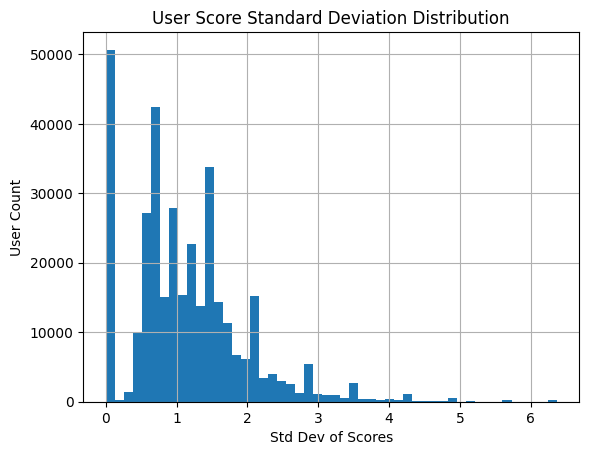

In [54]:
user_score_std.hist(bins=50)
plt.title("User Score Standard Deviation Distribution")
plt.xlabel("Std Dev of Scores")
plt.ylabel("User Count")
plt.show()


In [55]:
print(f"Low activity users: {len(low_activity_users)}")
print(f"Low score std users: {len(low_std_users)}")
print(f"Overlap: {len(set(low_activity_users) & set(low_std_users))}")


Low activity users: 530472
Low score std users: 164304
Overlap: 140672


In [56]:
# Combine masks
combined_user_mask = low_activity_mask | low_std_mask

# Preview how many rows affected
print(f"Rows to drop: {combined_user_mask.sum()}")

# Drop
nandropped = nandropped[~combined_user_mask].reset_index(drop=True)


Rows to drop: 2555940


In [57]:
nandropped.nunique()

user_id          53350
anime_id         27264
score               10
status               4
episodes_seen      565
dtype: int64

In [58]:
print(len(nandropped))

2892484


In [61]:
# Load the list of valid anime_ids from somewhatcleanedAnime.csv
valid_anime = pd.read_csv('../somewhatcleanedAnime.csv')  # adjust path if needed
valid_anime_ids = set(valid_anime['anime_id'])

# Filter nandropped to only include these anime_ids
final_df = nandropped[nandropped['anime_id'].isin(valid_anime_ids)].reset_index(drop=True)

In [71]:
print(len(final_df))

final_df['anime_id'].nunique()

2211596


22482

In [73]:
final_df.drop(columns=['status','episodes_seen'])       

,user_id,anime_id,score
0,charlieleb,52991,8.0
1,Celinho,52991,9.0
2,bolcio,52991,10.0
3,Jhin123,52991,10.0
4,Frfri,52991,10.0
...,...,...,...
2211591,Coolest1234D,51154,1.0
2211592,BBloodhound,51154,8.0
2211593,synraul,51154,6.0
2211594,ak47123,51154,8.0


In [74]:
final_df.to_csv('final_user_anime.csv', index=False)